### Regression Using MAP and Basis Functions

#### MAP

In [2]:
# Generate function with noise

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from numpy.linalg import inv

# Sine curve generation
X_sin = np.arange(0,1,0.02)
Y_sin = np.sin((X_sin**2) +1)

def add_noise(sigma, y_curve):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

Y_noise = add_noise(0.05, Y_sin)

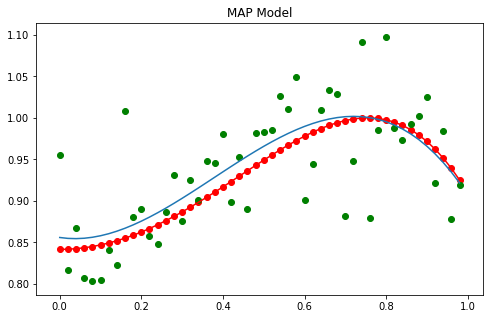

In [5]:
# Fitting noisy data using MAP

# Defining variable functions
def get_x(M, X):
    X_list= X.tolist()
    X_matrix_T_list = []
    
    for i in range(M):
        for j in X_list:
            X_matrix_T_list.append(j**i)
    
    X_matrix_T = np.array(X_matrix_T_list).reshape(M,len(X))
    X_matrix_T = np.matrix(X_matrix_T)
    
    return (np.transpose(X_matrix_T), X_matrix_T)

def get_w(a, M, X):
    X_matrix = get_x(M, X)[0]
    X_matrix_T = get_x(M, X)[1]
    t = Y_noise
    I = np.identity(M)
    
    XX_prod = np.dot(X_matrix_T, X_matrix)
    iden = np.dot(a,I)
    inversed =  inv(XX_prod + iden)
    w = np.dot( np.dot(inversed, X_matrix_T), t )
    
    return w.tolist()[0]
    
# Define power and alpha [section to edit]
power = 4
alpha = 0.0
W = get_w(alpha, power, X_sin)

# Define axes
def generate_graph(rng, intv, pwr, lst):
    x = np.arange(0, rng, intv)
    y = 0
    for i in range(pwr):
        term = lst[i]
        y += term*np.power(x, i)
    return y

Y_fit = generate_graph(1,0.02, 4, W)

# Plotting
plt.figure(figsize=(8,5))
plt.title('MAP Model')
plt.scatter(X_sin, Y_sin, c='r')
plt.plot(X_sin, Y_sin, c='r')
plt.scatter(X_sin, Y_noise, c='g')
plt.plot(X_sin, Y_fit)

c:\users\katherine\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


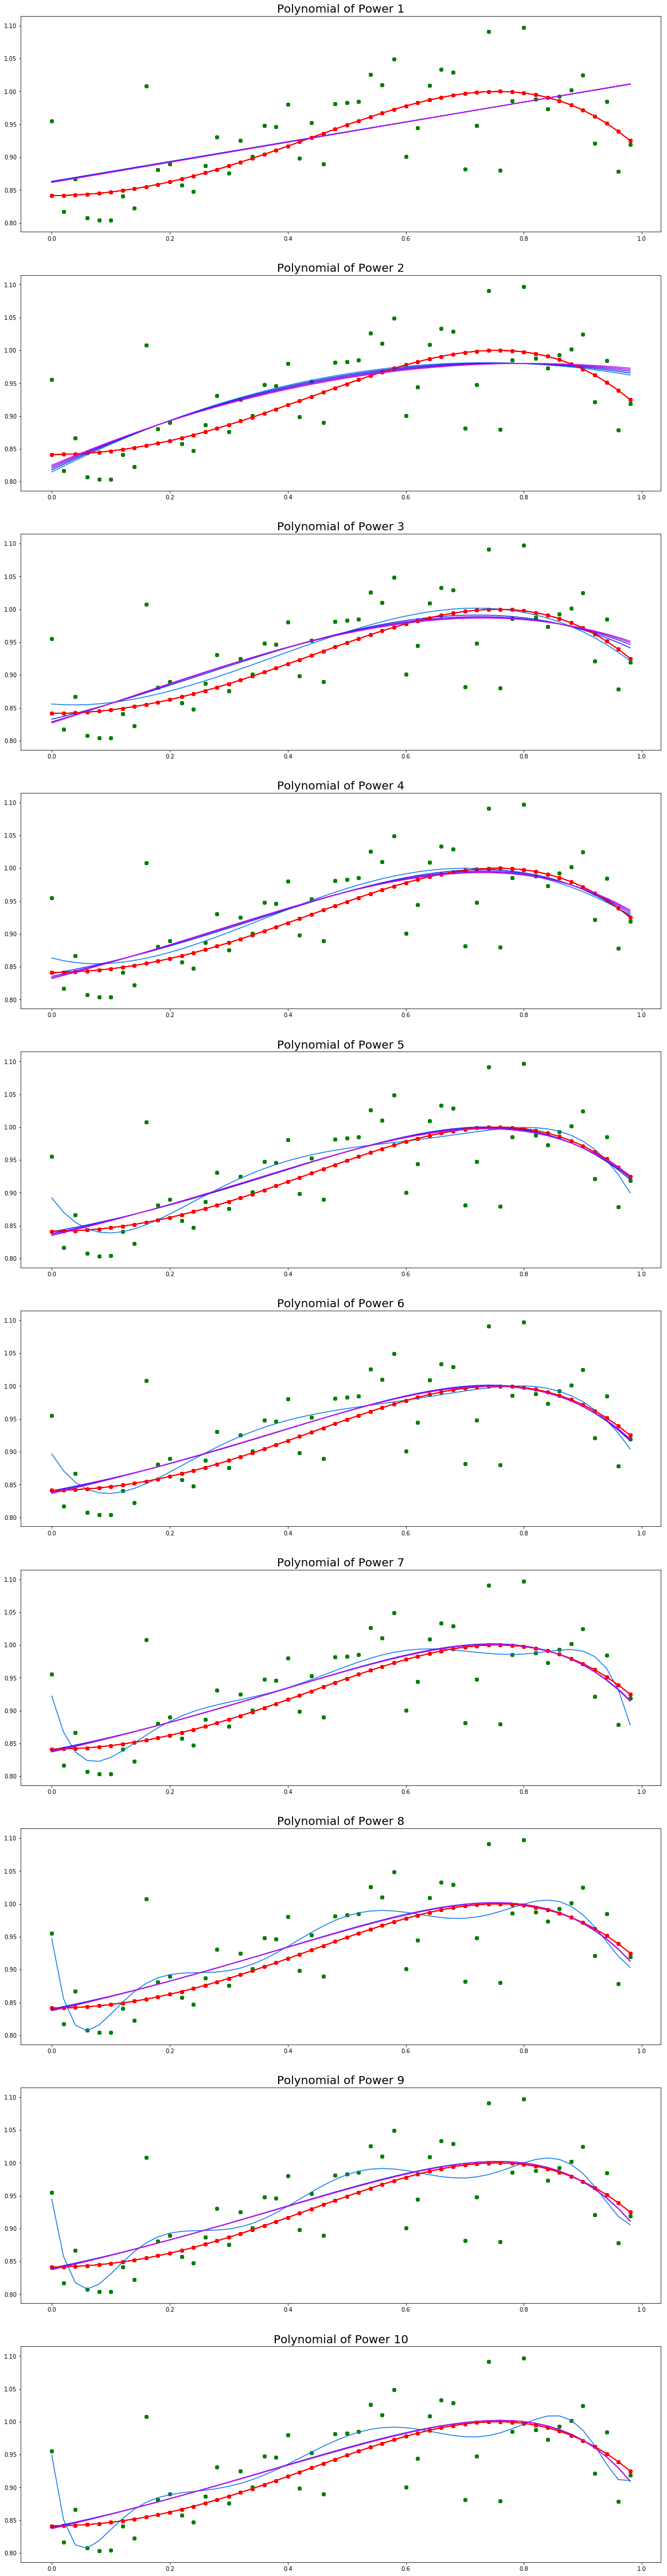

In [8]:
# Change M and alpha for varied results

powers = range(2,12)
alphas = range(0,5)
fig = plt.figure(figsize=(20,90))
color = ['#1079ea','#1029ea','#5810ea','#9210ea','#c910ea','#f409f4']

for power in powers:
    for j in alphas:
        
        alpha = j/100
        
        W = get_w(alpha, power, X_sin)
        Y_fit = generate_graph(1, 0.02, power, W)

        ax = fig.add_subplot(11,1,power-1)
        plt.title("Polynomial of Power {}".format(power-1), fontsize=20)
        plt.scatter(X_sin, Y_sin, c='r')
        plt.plot(X_sin, Y_sin, c='r')
        plt.scatter(X_sin, Y_noise, c='g')
        plt.plot(X_sin, Y_fit, c=color[j])

        

#### Basis Function 

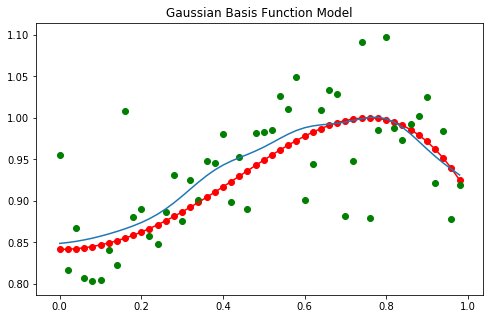

In [12]:
# Fit noisy data with Gaussian Basis Function

def get_matrix_gbf(x, m, s):
    
    X_list = x.tolist()
    X_matrix_list = [1]*(len(X_list))
    
    for i in range(1, m):
        mu = np.linspace(0,1,m)[i]
        
        for j in X_list:
            term = np.exp(-(j-mu)**2/(2*s**2))
            X_matrix_list.append(term)
            
    X_matrix_T = np.array(X_matrix_list).reshape(m, len(X_list))
    X_matrix = X_matrix_T.T
    
    W = np.dot(np.dot(inv(np.dot(X_matrix_T, X_matrix)), X_matrix_T), Y_noise)
    
    return (W.tolist(), X_matrix)


# Getting Values:
M=6
w_hat = get_matrix_gbf(X_sin, M, 0.1)[0]
Y_gbf = np.dot(get_matrix_gbf(X_sin, M, 0.1)[1], w_hat)


# Plotting
plt.figure(figsize=(8,5))
plt.title('Gaussian Basis Function Model')
plt.scatter(X_sin, Y_sin, c='r')
plt.plot(X_sin, Y_sin, c='r')
plt.scatter(X_sin, Y_noise, c='g')
plt.plot(X_sin, Y_gbf)



c:\users\katherine\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


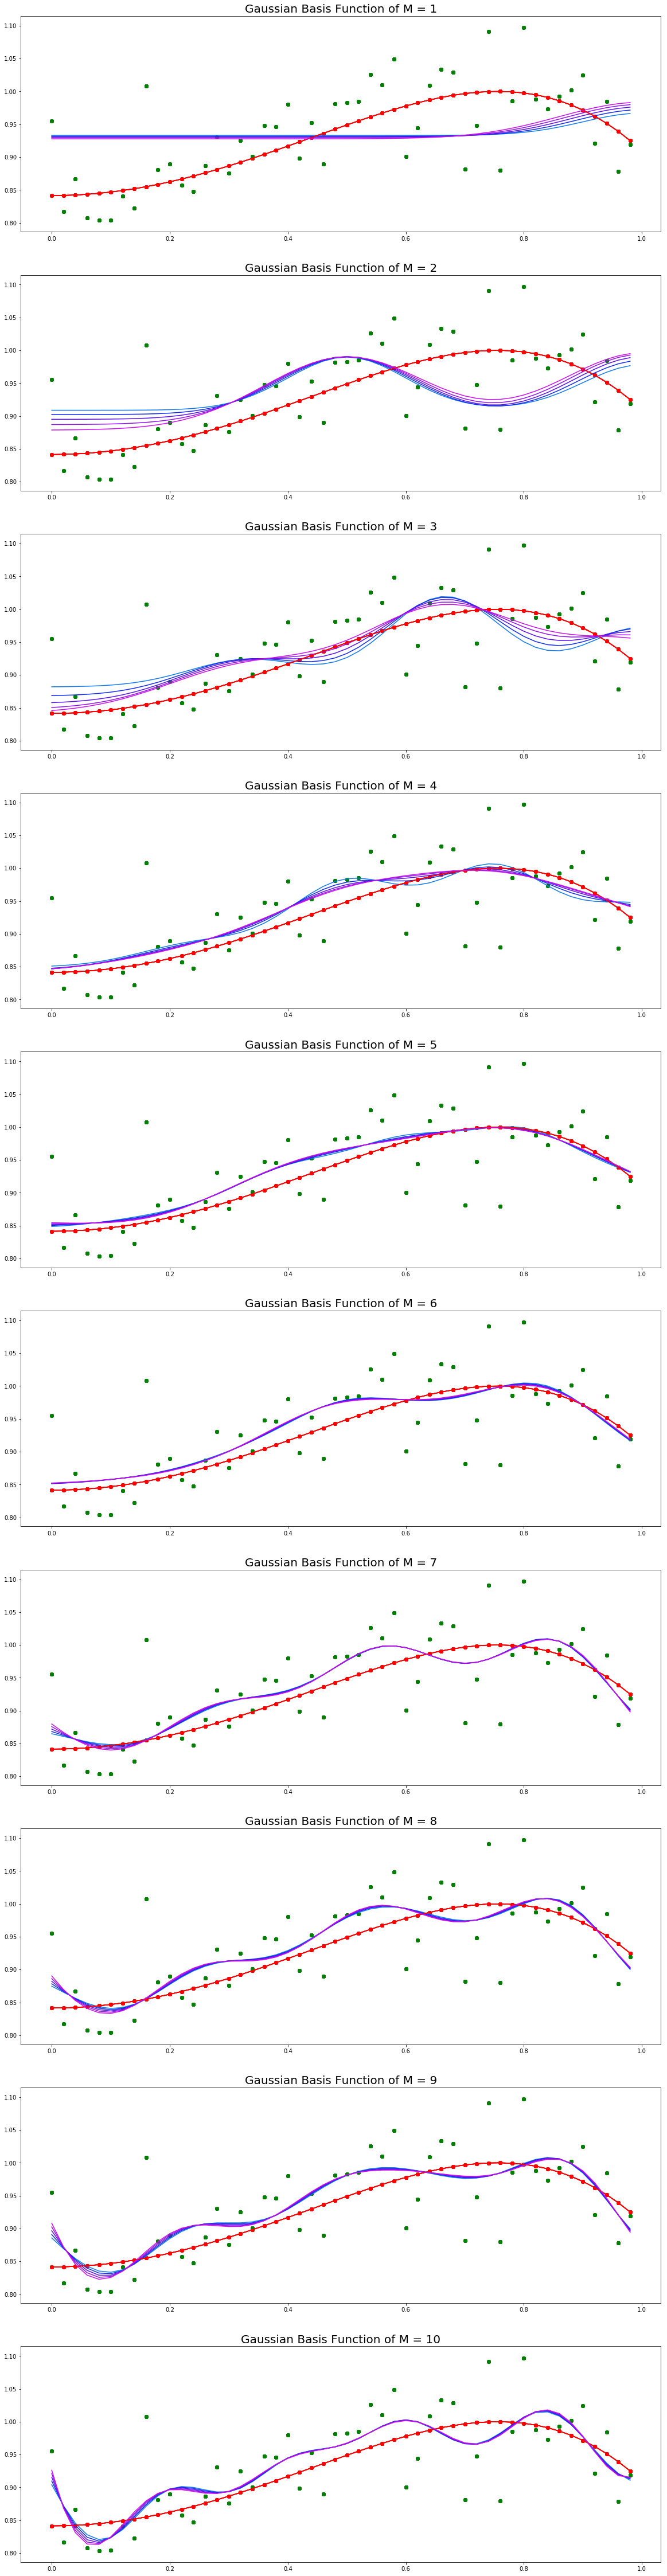

In [13]:
# Use diferent M to fit noisy data with Gaussian Basis Function

M_list = range(2,12)
sigma_list = range(10,15)
fig = plt.figure(figsize=(20,90))
color = ['#1079ea','#1029ea','#5810ea','#9210ea','#c910ea','#f409f4']

for m in M_list:
    for j in sigma_list:
        
        sigma = j/100
        w_hat = get_matrix_gbf(X_sin, m, sigma)[0]
        Y_gbf = np.dot(get_matrix_gbf(X_sin, m, sigma)[1], w_hat)

        ax = fig.add_subplot(11,1,m-1)
        plt.title("Gaussian Basis Function of M = {}".format(m-1), fontsize=20)
        plt.scatter(X_sin, Y_sin, c='r')
        plt.plot(X_sin, Y_sin, c='r')
        plt.scatter(X_sin, Y_noise, c='g')
        plt.plot(X_sin, Y_gbf, c=color[j-10]) #lower sigma, more curved

# Comments: Here we see that there is underfitting happening at M=1, overfitting at M=10

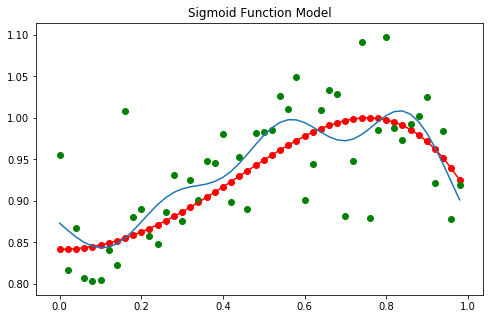

In [14]:
# Fit noisy data with Gaussian Basis Function

def get_matrix_sigmoid(x, y, m, s, domain):
    
    X_list = x.tolist()
    X_matrix_list = [1]*(len(X_list)) #first entries should be 1 for phi 0
    
    # Make the matrix
    for i in range(1, m):
        mu = np.linspace(0,domain,m)[i]
        
        for j in X_list:
            term = 1/(1+ np.exp((j-mu)/s))
            X_matrix_list.append(term)
            
    X_matrix_T = np.array(X_matrix_list).reshape(m, len(X_list))
    X_matrix = X_matrix_T.T
    
    # Calculate w
    W = np.dot(np.dot(inv(np.dot(X_matrix_T, X_matrix)), X_matrix_T), y)
    
    return (W.tolist(), X_matrix)


# Getting Values:
M=10
w_hat_sigmoid = get_matrix_sigmoid(X_sin, Y_noise, M, 0.1,1)[0]
Y_sigmoid = np.dot(get_matrix_sigmoid(X_sin, Y_noise, M, 0.1,1)[1], w_hat_sigmoid) #apply w onto matrix


# Plotting
plt.figure(figsize=(8,5))
plt.title('Sigmoid Function Model')
plt.scatter(X_sin, Y_sin, c='r')
plt.plot(X_sin, Y_sin, c='r')
plt.scatter(X_sin, Y_noise, c='g')
plt.plot(X_sin, Y_sigmoid)



c:\users\katherine\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


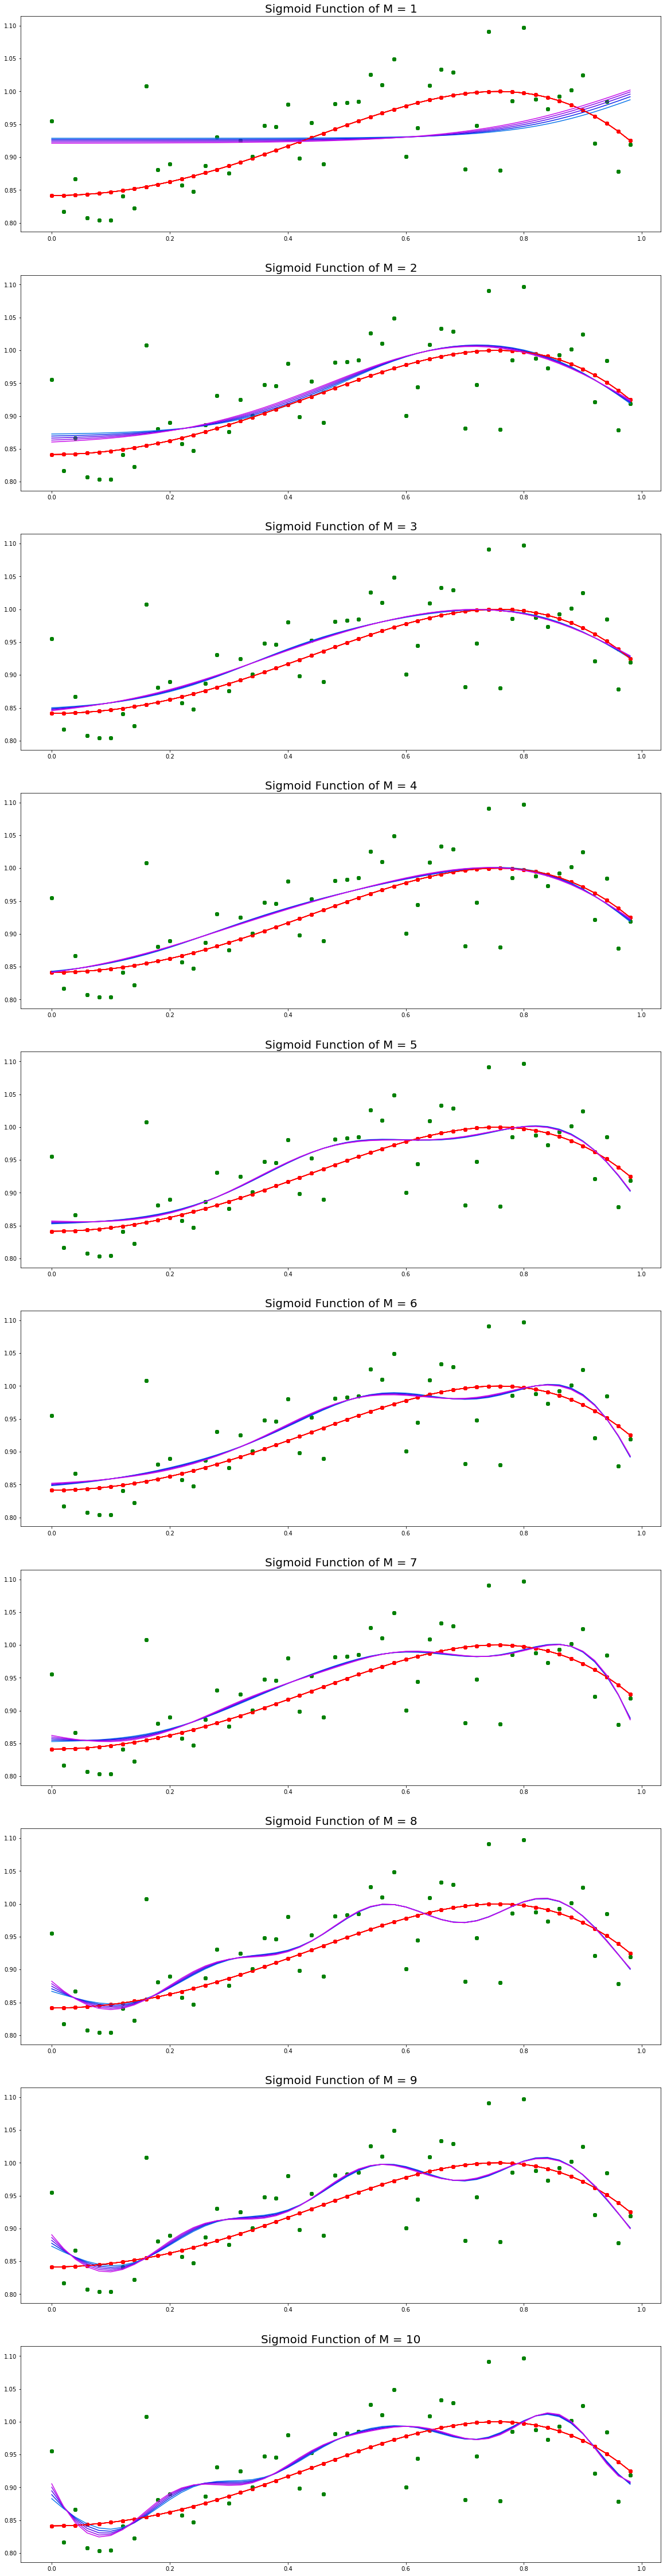

In [15]:
# Use diferent M to fit noisy data with Sigmoid function

M_list = range(2,12)
sigma_list = range(10,15)
fig = plt.figure(figsize=(20,90))
color = ['#1079ea','#1029ea','#5810ea','#9210ea','#c910ea','#f409f4']

for m in M_list:
    for j in sigma_list:
        
        sigma = j/100
        w_hat = get_matrix_sigmoid(X_sin, Y_noise, m, sigma, 1)[0]
        Y_sigmoid = np.dot(get_matrix_sigmoid(X_sin, Y_noise, m, sigma, 1)[1], w_hat)

        ax = fig.add_subplot(11,1,m-1)
        plt.title("Sigmoid Function of M = {}".format(m-1), fontsize=20)
        plt.scatter(X_sin, Y_sin, c='r')
        plt.plot(X_sin, Y_sin, c='r')
        plt.scatter(X_sin, Y_noise, c='g')
        plt.plot(X_sin, Y_sigmoid, c=color[j-10]) #lower sigma, more curved

# Comments: Here we see that there is underfitting happening at M=1, overfitting at M=10

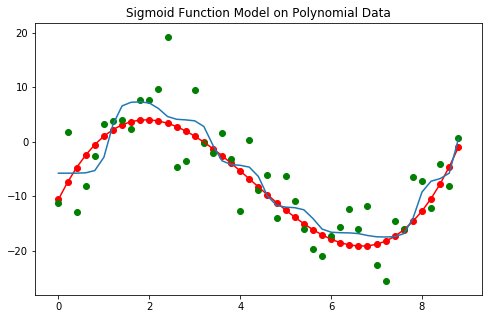

In [16]:
# Experiment with Polynomial curve
    # Method: By 'best fitting curve' we try to choose an M and sigma that gives the lowest error
    # This is done by looping through a list of values to get the values

X_poly = np.arange(0,9,0.2)
Y_poly = generate_graph(9, 0.2, 4, [-10.61, 16.78, -5.607, 0.4345])
Y_poly_noise = add_noise(5, Y_poly)

error_dict = {}

for m in range(3,10):
    for j in range(10,15):
        sigma = j/100
        w_hat_sigmoid_poly = get_matrix_sigmoid(X_poly,Y_poly_noise, m, sigma,9)[0]
        Y_sigmoid_poly = np.dot(get_matrix_sigmoid(X_poly,Y_poly_noise, m, sigma,9)[1], w_hat_sigmoid_poly)
        error = error_value(Y_sigmoid_poly, Y_poly_noise)
        error_dict['M = '+str(m)+', sigma = '+str(sigma)+ ', error = '+str(error)] = error

result = min(error_dict, key=error_dict.get)

# Results states best value is M = 9, sigma = 0.1
w_hat_sigmoid_poly = get_matrix_sigmoid(X_poly,Y_poly_noise, 9, 0.1,9)[0]
Y_sigmoid_poly = np.dot(get_matrix_sigmoid(X_poly,Y_poly_noise, 9, 0.1,9)[1], w_hat_sigmoid_poly)      

plt.figure(figsize=(8,5))
plt.title('Sigmoid Function Model on Polynomial Data')
plt.scatter(X_poly, Y_poly, c='r')
plt.plot(X_poly, Y_poly, c='r')
plt.scatter(X_poly, Y_poly_noise, c='g')
plt.plot(X_poly, Y_sigmoid_poly)


### Comments of the algorithms

 In comparion, the advantage of using basis functions is that they are more 'flexible' and hence more expressive for fitting. This is since polynomial functions  apply the powers of the equation on all data points while basis functions
 are less restricted in that sense since they are consisted of multiple functions supporting each point.